In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def myImread(path):
    bgr_img = cv2.imread(path)
    assert bgr_img is not None, "이미지 로드 실패"
    rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
    return rgb_img


'''
opencv 함수에서 문제 발생시
pip uninstall opencv-contriib-python opencv-python
pip install opencv-contrib-python

'''

'\nopencv 함수에서 문제 발생시\npip uninstall opencv-contriib-python opencv-python\npip install opencv-contrib-python\n\n'

In [3]:
def Harris(img, blockSize=2, apertureSize=3, k=0.04, thresh=0.1):
    radian = 3
    color = (255,0,0)
    thickness = 2
    
    h,w,c = img.shape
    result_img = img.copy()
    
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    corner_response = cv2.cornerHarris(gray_img, blockSize, apertureSize, k)
    
    max_value = np.max(corner_response)
    corner_response /= max_value
    
    for y in range(h):
        for x in range(w):
            if(corner_response[y,x] > thresh):
                cv2.circle(result_img, (x,y), radian, color, 2)
                
    return result_img

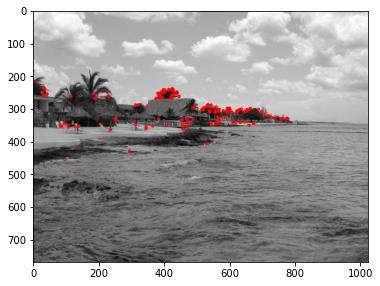

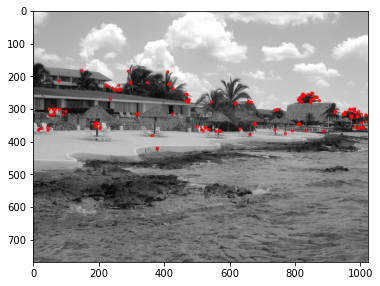

In [4]:
hotel1 = myImread("./hotel-00.png")
hotel2 = myImread("./hotel-01.png")

hotel_harris1 = Harris(hotel1,thresh=0.1)
hotel_harris2 = Harris(hotel2,thresh=0.1)

plt.figure(figsize=(6,6))
plt.imshow(hotel_harris1)

plt.figure(figsize=(6,6))
plt.imshow(hotel_harris2)

In [7]:
import cv2

def SIFT(img, nfeatures=0, nOctaveLayers=3, contrastThreshold=0.04, edgeThreshold=10, sigma=1.6, draw_rich=False):
    radian = 3
    color = (255,0,0)
    thickness = 2
    
    h,w,c = img.shape
    result_img = img.copy()    
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    sift = cv2.xfeatures2d.SIFT_create(nfeatures, nOctaveLayers, contrastThreshold, edgeThreshold, sigma)
    kp = sift.detect(gray_img, None)

    if draw_rich:
        cv2.drawKeypoints(result_img, kp, result_img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    else:
        kp_xy = cv2.KeyPoint_convert(kp)
        for x,y in kp_xy:
            cv2.circle(result_img, (x,y), radian, color, thickness)
                
    return result_img

<ipython-input-7-751b57cff55a>:20: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.circle(result_img, (x,y), radian, color, thickness)


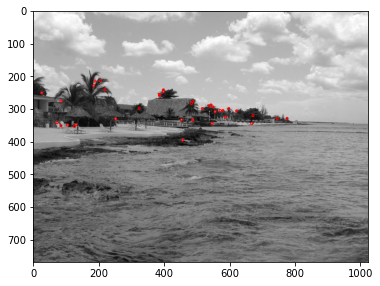

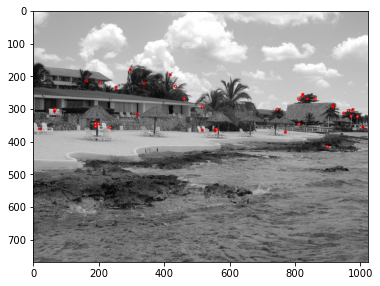

In [8]:
hotel1 = myImread("./hotel-00.png")
hotel2 = myImread("./hotel-01.png")

hotel_SIFT1 = SIFT(hotel1, nfeatures=50)
hotel_SIFT2 = SIFT(hotel2, nfeatures=50)

plt.figure(figsize=(6,6))
plt.imshow(hotel_SIFT1)

plt.figure(figsize=(6,6))
plt.imshow(hotel_SIFT2)

In [9]:
def Compare(path):
    img = myImread(path)
    img_harris = Harris(img,)
    img_sift = SIFT(img, draw_rich=True)
    
    plt.figure(figsize=(12,12))
    plt.subplot(1,3,1)
    plt.title("Original")
    plt.imshow(img)
    
    plt.subplot(1,3,2)
    plt.title("harris")
    plt.imshow(img_harris)
    
    plt.subplot(1,3,3)
    plt.title("SIFT")
    plt.imshow(img_sift)

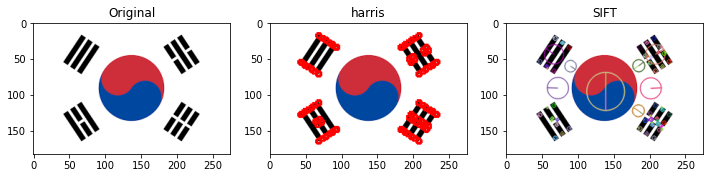

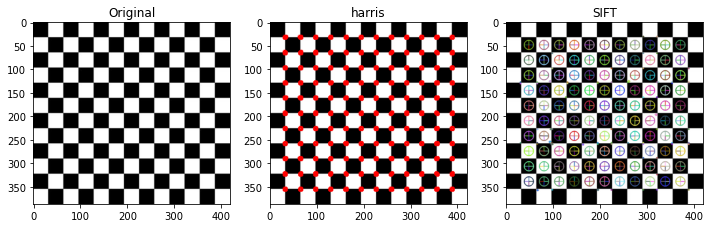

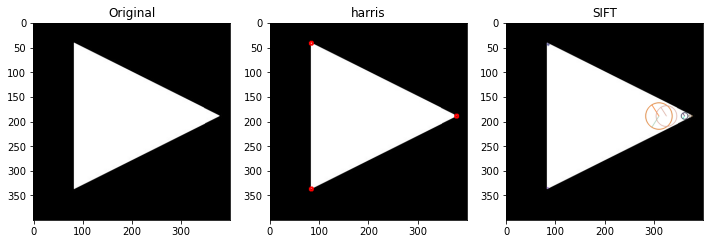

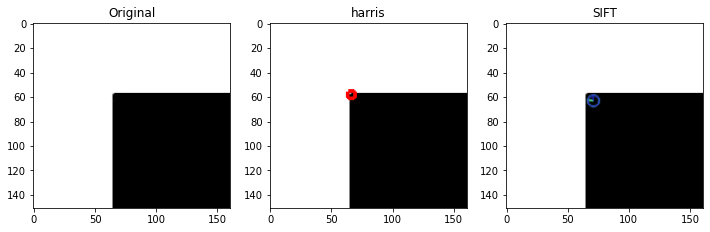

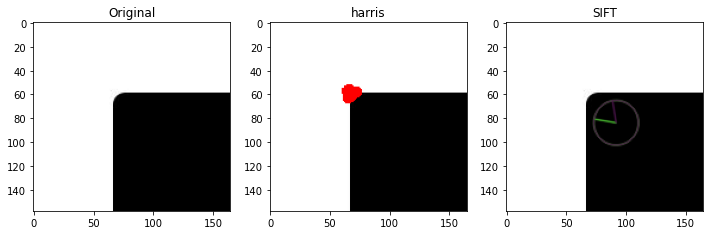

In [10]:
Compare("./korea.png")
Compare("./checkerboard.png")
Compare("./triangle.jpg")
Compare("./test1.jpg")
Compare("./test2.jpg")

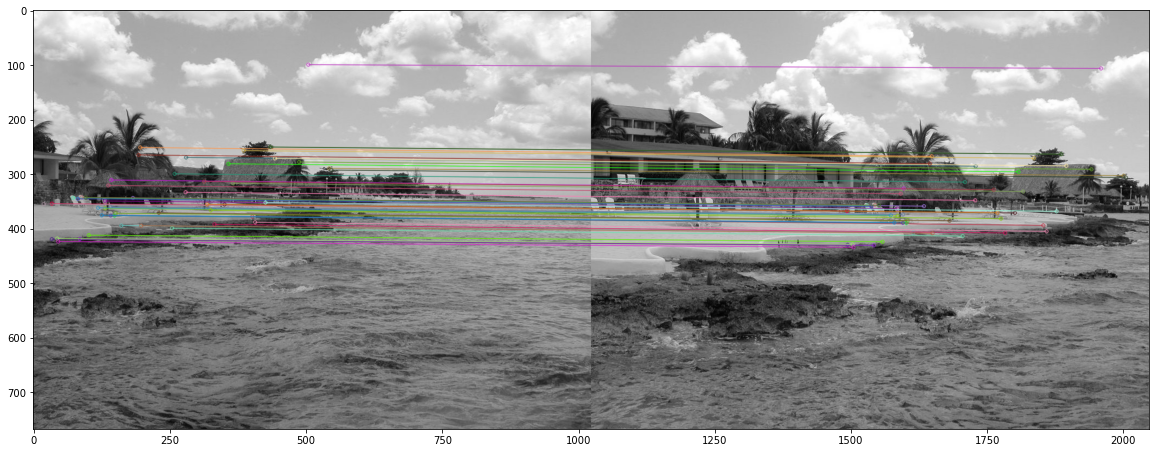

(<matplotlib.image.AxesImage at 0x7f8cca4c5b20>, None)

In [11]:
img1 = myImread("./hotel-00.png")
img2 = myImread("./hotel-01.png")

sift = cv2.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.figure(figsize=(20,20))
plt.imshow(img3),plt.show()


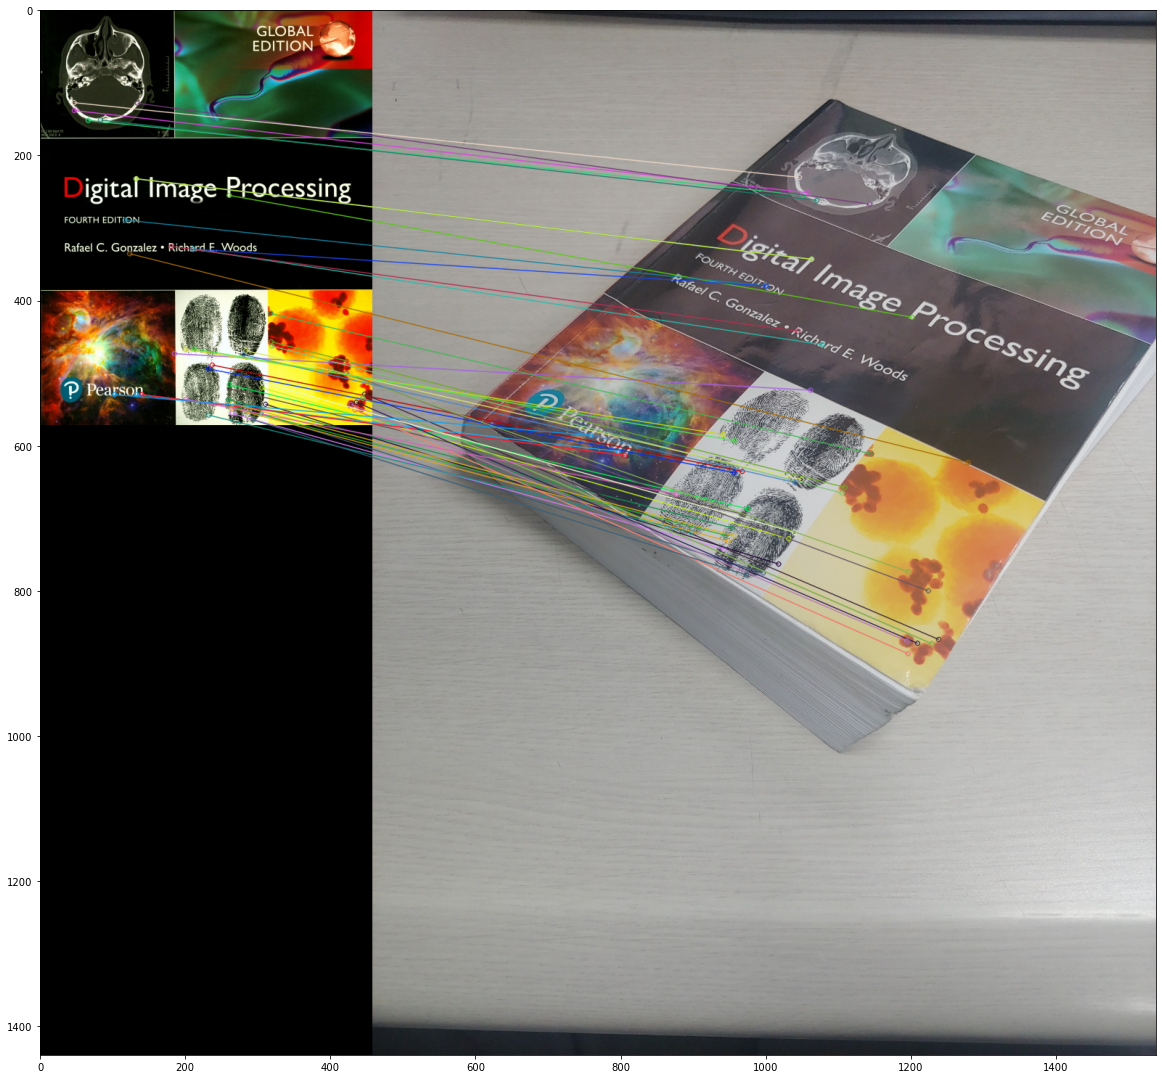

(<matplotlib.image.AxesImage at 0x7f8cbe2e0820>, None)

In [12]:
img1 = myImread("./book1.jpg")
img2 = myImread("./book2.jpg")

sift = cv2.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.figure(figsize=(20,20))
plt.imshow(img3),plt.show()